In [1]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_csv("Data.csv")
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [3]:
df1 = df.drop(["area_type","availability","balcony","society"],axis= "columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df2 = df1.dropna()
df2.shape

(13246, 5)

In [5]:
d = "2030"
c = d.split("-")
type(c[0])

str

In [6]:
def convert_float(x):
    tok = x.split("-")
    if len(tok) == 2:
        return ((float(tok[0])+float(tok[1]))/2)
    try:
        return float(x)
    except:
        None
                 
df3 = df2.copy()                
df3.total_sqft = df3.total_sqft.apply(convert_float)

In [7]:
df4 = df3.copy()
df4["price_sqft"] = (df3["price"]*100000)/(df3["total_sqft"])
df4.head()


,location,size,total_sqft,bath,price,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [8]:
df5 = df4.copy()
df5["bhk"] = df5["size"].apply(lambda s  : int(s.split(" ")[0]))
df5

,location,size,total_sqft,bath,price,price_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,11111.111111,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319,4


In [9]:
df5.location = df5.location.apply(lambda x : x.strip())
loca = df5["location"].value_counts(ascending = True)
loca

Kuvempu Layout                     1
Gubbi Cross, Hennur Main Road      1
Grihalakshmi Layout                1
AGB Layout                         1
Venkateswara Nagar                 1
                                ... 
Thanisandra                      236
Kanakpura Road                   266
Electronic City                  304
Sarjapur  Road                   392
Whitefield                       535
Name: location, Length: 1293, dtype: int64

In [10]:
location_stats = loca[loca<=10]
location_stats

df5.location = df5.location.apply(lambda x : "other" if x in location_stats else x)

In [11]:
#df6 = df5.copy()
df5["bhk"] = df5["size"].apply(lambda x : int(x.split(" ")[0]))
df5


,location,size,total_sqft,bath,price,price_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926,5
13316,other,4 BHK,3600.0,5.0,400.00,11111.111111,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319,4


In [12]:
df5 = df5[~(df5.total_sqft/df5.bhk <300)]
df5.shape

(12502, 7)

In [13]:
def outliers(df):
    df_1 = pd.DataFrame()
    for key, sub in df.groupby("location"):
        m = np.mean(sub.price_sqft)
        s = np.std(sub.price_sqft)
        red = sub[(sub.price_sqft > (m-s)) &  (sub.price_sqft <(m+s))]
        df_1 = pd.concat([df_1,red],ignore_index = True)
    return df_1
df6 = outliers(df5)
df6

,location,size,total_sqft,bath,price,price_sqft,bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,15017.543860,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,11901.840491,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,12533.333333,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,10833.333333,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,11983.805668,2
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,8130.081301,2
10237,other,1 Bedroom,812.0,1.0,26.00,3201.970443,1
10238,other,3 BHK,1440.0,2.0,63.93,4439.583333,3
10239,other,2 BHK,1075.0,2.0,48.00,4465.116279,2


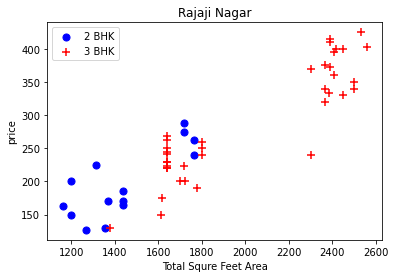

In [14]:
#plotting Graph

def plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) &(df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color = "blue",label = "2 BHK" , s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker= "+", color = "red",label = "3 BHK",s= 50)
    plt.xlabel("Total Squre Feet Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
                
plot(df6,"Rajaji Nagar")

In [18]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7329, 7)

In [19]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [20]:
df8 = df8.drop(['size','price_sqft'],axis='columns')
df8.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [21]:
#converting categorical data into Mathematics data

dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df9 = pd.concat([df8,dummies.drop("other",axis = "columns")],axis = "columns")
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df10 = df9.drop(["location","price"], axis = "columns")
df10.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x = df10
x.shape

(7251, 244)

In [25]:
y = df9.price
y.shape

(7251,)

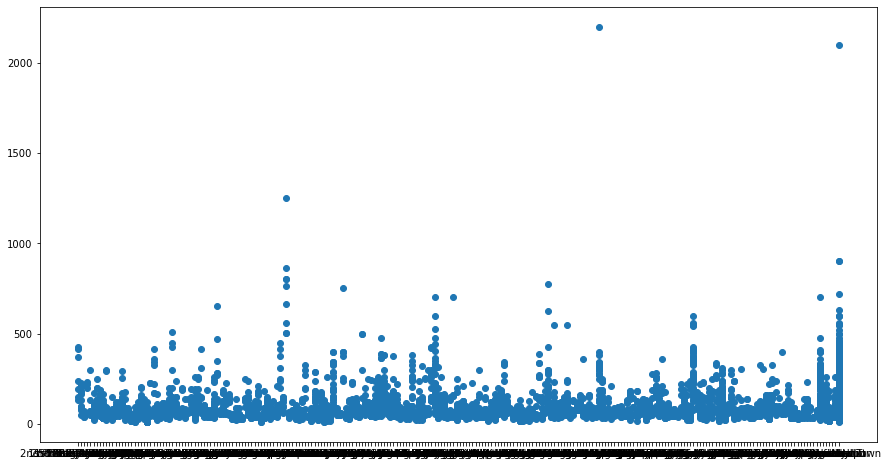

In [26]:
matplotlib.rcParams["figure.figsize"] = (15,8)
plt.scatter(df9["location"],y)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [28]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874312

In [29]:
lr_clf.coef_[0]
lr_clf.intercept_


-4.138372824951091

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [31]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.719844,"{'criterion': 'mse', 'splitter': 'best'}"


In [32]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    y = np.zeros(len(x.columns))
    y[0] = sqft
    y[1] = bath
    y[2] = bhk
    if loc_index >= 0:
        y[loc_index] = 1

    return lr_clf.predict([y])[0]

In [33]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677179231

In [34]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033458